### Exploratory Data Analysis

In [90]:
# import libraries
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import datetime as dt

from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
from nltk import ngrams, bigrams, trigrams
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
# read in the cleaned data
df = pd.read_csv('./data/reviews_clean.csv', index_col=0)
df.head()

,review,stars,date,country,review_length,verified,corpus
0,I was flying to Warsaw for one day of meeting...,1.0,2022-12-03,United States,1387,True,flying warsaw one day meeting would flying bac...
1,"Booked a BA holiday to Marrakech, after posti...",9.0,2022-11-30,United Kingdom,487,True,booked ba holiday marrakech posting negative r...
2,Extremely sub-par service. Highlights: No onli...,2.0,2022-11-28,United States,798,True,extremely sub par service highlight online mea...
3,I virtually gave up on British Airways about ...,7.0,2022-11-26,United Kingdom,473,True,virtually gave british airway three year ago w...
4,I was pleasantly surprised that the airline c...,7.0,2022-11-25,Canada,655,True,pleasantly surprised airline could maintain st...


In [10]:
# overall rating given for British Airways
df['stars'].mean()

4.3075

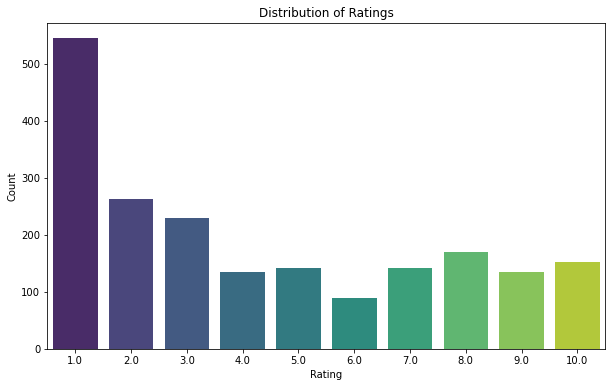

In [13]:
# plot distribution of ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='stars', data=df, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count of ratings')
plt.show()


In [18]:
# Normalize the ratings
df.stars.value_counts(normalize=True).sort_index()

1.0     0.2725
2.0     0.1310
3.0     0.1150
4.0     0.0675
5.0     0.0710
6.0     0.0445
7.0     0.0710
8.0     0.0845
9.0     0.0670
10.0    0.0760
Name: stars, dtype: float64

In [19]:
# Find the number of unique countries
df.country.nunique()

64

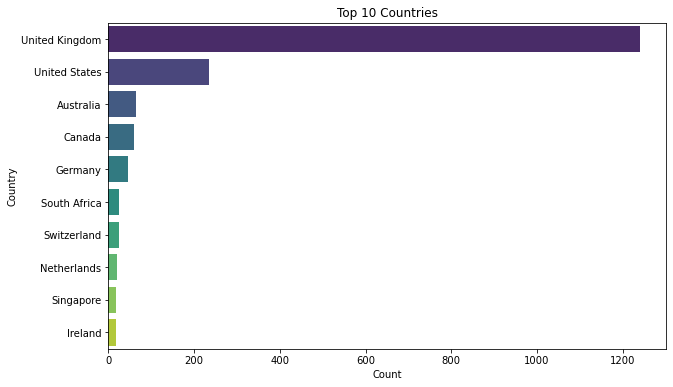

In [20]:
# Plot top 10 countries
plt.figure(figsize=(10, 6))
sns.countplot(y='country', data=df, order=df.country.value_counts().iloc[:10].index, palette='viridis')
plt.title('Top 10 Countries')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

In [21]:
# Find country that provided the highest rating
df.groupby('country')['stars'].mean().sort_values(ascending=False).head(10)

country
Saint Kitts and Nevis    10.000000
Panama                   10.000000
Egypt                    10.000000
Vietnam                   9.000000
Costa Rica                9.000000
Japan                     8.666667
Hungary                   8.500000
Bahrain                   7.000000
Dominican Republic        7.000000
Poland                    6.500000
Name: stars, dtype: float64

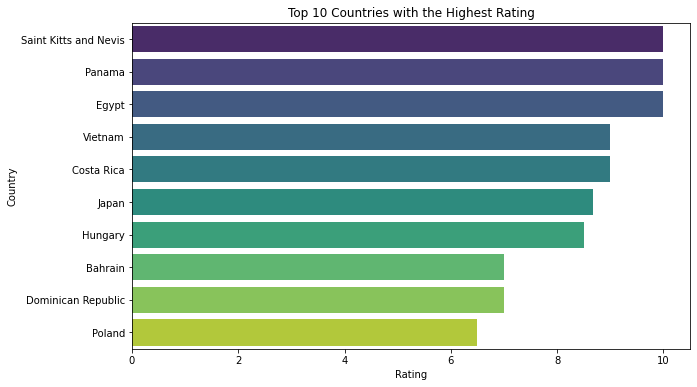

In [37]:
# Plot the top 10 countries with the highest rating
plt.figure(figsize=(10, 6))
sns.barplot(x='stars', y='country', data=df, 
            order=df.groupby('country')['stars'].mean().sort_values(ascending=False).head(10).index, 
            palette='viridis', ci=None)
plt.title('Top 10 Countries with the Highest Rating')
plt.xlabel('Rating')
plt.ylabel('Country')
plt.show()

In [24]:
# Find country that provided the lowest rating
df.groupby('country')['stars'].mean().sort_values(ascending=True).head(10)

country
Jordan                1.000000
Israel                1.000000
Indonesia             1.000000
Czech Republic        1.500000
Denmark               1.666667
Turkey                2.000000
Russian Federation    2.000000
Luxembourg            2.000000
Laos                  2.000000
Cayman Islands        2.000000
Name: stars, dtype: float64

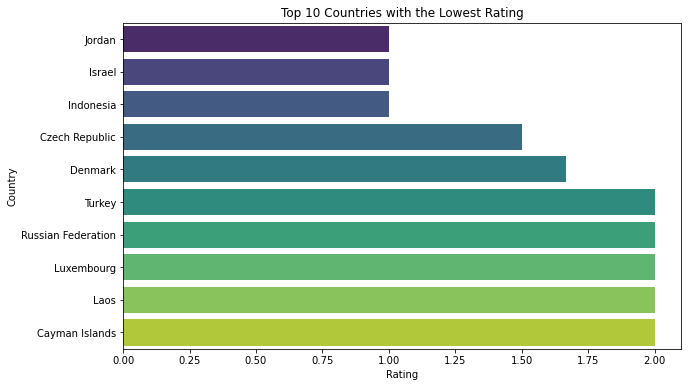

In [38]:
# Plot the top 10 countries with the lowest rating
plt.figure(figsize=(10, 6))
sns.barplot(x='stars', y='country', data=df,
            order=df.groupby('country')['stars'].mean().sort_values(ascending=True).head(10).index,
            palette='viridis', ci=None)
plt.title('Top 10 Countries with the Lowest Rating')
plt.xlabel('Rating')
plt.ylabel('Country')
plt.show()

In [42]:
# plot a time series using plotly
fig = px.line(df, x='date', y='stars', title='Time Series of Ratings')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

This plot is quite messy and there is no particular trend that can be seen. Let’s try to plot the average rating per month.

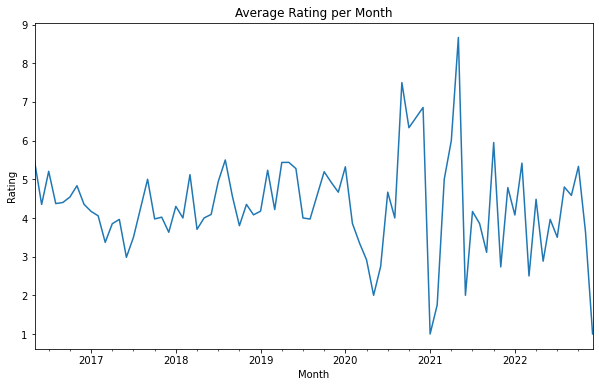

In [45]:
# plot average rating per month
df['month'] = pd.to_datetime(df['date']).dt.to_period('M')
df.groupby('month')['stars'].mean().plot(figsize=(10, 6))
plt.title('Average Rating per Month')
plt.xlabel('Month')
plt.ylabel('Rating')
plt.show()

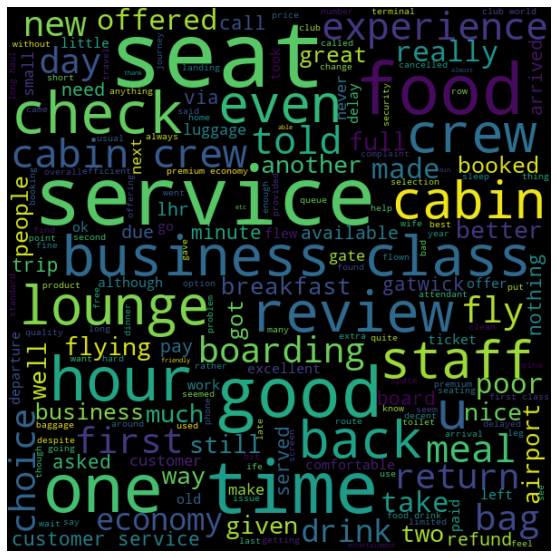

In [79]:
# generate a word cloud only for positive reviews
stopwords = set(STOPWORDS)

# update stopwords
stopwords.update(["ba", "flight", "british", "airway", "airline", "plane", "passenger",
                 "london", "heathrow", "aircraft", "verified"])

# join the corpus
good_reviews = ' '.join(df[df['stars']>=7]['corpus'])

wordcloud = WordCloud(height=600, width=600, background_color='black', stopwords=stopwords, 
                    max_words=200, max_font_size=100, random_state=42).generate(good_reviews)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

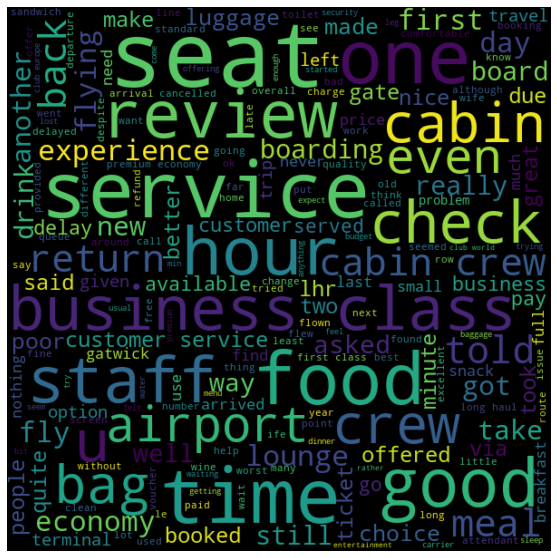

In [80]:
# generate a word cloud for negative reviews
stopwords = set(STOPWORDS)
stopwords.update(["ba", "flight", "british", "airway", "airline", "plane", "passenger",
                 "london", "heathrow", "aircraft", "verified"])

# join the corpus
bad_reviews = ' '.join(df[df['stars'] <= 3]['corpus'])

wordcloud = WordCloud(height=600, width=600, background_color='black', stopwords=stopwords, 
                    max_words=200, max_font_size=100, random_state=42).generate(bad_reviews)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

I could not find much difference in the word clouds for positive and negative reviews.

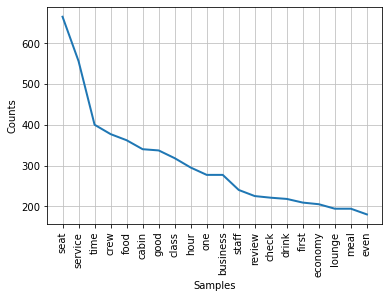

In [87]:
# word frequency for positive reviews
# tokenize the corpus
tokens = nltk.word_tokenize(good_reviews)

# remove stopwords
tokens = [token for token in tokens if token not in stopwords]

# find the frequency of each word
fdist = FreqDist(tokens)

# plot the top 20 words
fdist.plot(20, cumulative=False)
plt.show()

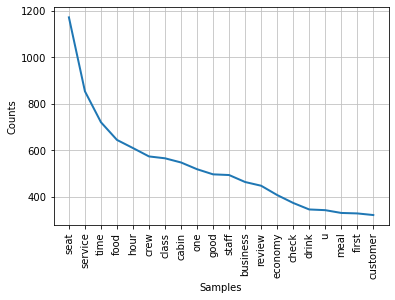

In [86]:
# word frequency for negative reviews
# tokenize the corpus
tokens = nltk.word_tokenize(bad_reviews)

# remove stopwords
tokens = [token for token in tokens if token not in stopwords]

# find the frequency of each word
fdist = FreqDist(tokens)

# plot the top 20 words
fdist.plot(20, cumulative=False)
plt.show()